## Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.linear_model import LinearRegression
sys.path.append('../')

## Reading Dataset

In [2]:
df = pd.read_csv("../datasets/final_novas_features.csv")
df_prev = pd.read_csv("../datasets/calculated_features_final19356_253493_147567893553946290238604574175400014296.csv")
print(list(df.columns))
print(df.shape)

['Unnamed: 0', 'scout_id', 'match_week', 'player_id', 'team_id', 'delta_price', 'position_id', 'year', 'name', 'has_played', 'score', 'average_points_last_1_rounds', 'average_price_last_1_rounds', 'stddev_points_last_1_rounds', 'stddev_price_last_1_rounds', 'team_average_points_last_1_rounds', 'team_average_price_last_1_rounds', 'enemy_average_points_last_1_rounds', 'enemy_average_price_last_1_rounds', 'team_goals_scored_last_1_rounds', 'team_goals_taken_last_1_rounds', 'team_points_last_1_rounds', 'enemy_goals_scored_last_1_rounds', 'enemy_goals_taken_last_1_rounds', 'enemy_points_last_1_rounds', 'home_team', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', 'average_plays_last_1_rounds_rb_play', 'average_plays_last_1_rounds_fc_play', 'average_plays_last_1_rounds_gc_play', 'average_plays_last_1_rounds_ca_play', 'average_plays_last_1_rounds_cv_play', 'average_plays_last_1_rounds_sg

## Pre Processing

In [3]:
auxiliary = ['Unnamed: 0','scout_id', 'match_week', 'player_id', 'team_id', 'position_id',
             'home_team.1', 'home_team.2', 'home_team.3', 'year', 'name', 'has_played', 'delta_price']

In [4]:
from data_science_utils.data_processing.data_processing import DatasetProcessing
dp = DatasetProcessing(df, auxiliary)
dp.correct_dataset()
dp.count_null()
dp.drop_zero_var()
dp.drop_null(max_null_ratio=0.4)
df = dp.hot_encode()
dp.fill_null(value = 0, feature_list=list(df.columns))

average_points_last_1_rounds......................1573
average_price_last_1_rounds.......................1573
stddev_points_last_1_rounds.......................22229
stddev_price_last_1_rounds........................22229
team_average_points_last_1_rounds.................833
team_average_price_last_1_rounds..................833
enemy_average_points_last_1_rounds................888
enemy_average_price_last_1_rounds.................888
team_goals_scored_last_1_rounds...................833
team_goals_taken_last_1_rounds....................833
team_points_last_1_rounds.........................833
enemy_goals_scored_last_1_rounds..................888
enemy_goals_taken_last_1_rounds...................888
enemy_points_last_1_rounds........................888
home_team.........................................265
0.................................................981
0.1...............................................981
0.2...............................................981
0.3...................

ZERO VARIANCE FEATURES:

0.8
average_plays_last_1_rounds_cv_play


REMOVED FEATURES WITH MORE THAN 40% NULL

stddev_points_last_1_rounds


../data_science_utils/data_processing/data_processing.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df.drop(col, axis=1, inplace=True)
../data_science_utils/data_processing/data_processing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df.drop(col, axis=1, inplace=True)


stddev_price_last_1_rounds
0.3
0.4
0.10
0.13
0.14
0.31
0.32
0.34
0.35
0.52
0.53
0.55
0.56
0.73
0.74
0.76
0.77


NULL COUNT IN REMAINING FEATURES

average_points_last_1_rounds......................1573
average_price_last_1_rounds.......................1573
team_average_points_last_1_rounds.................833
team_average_price_last_1_rounds..................833
enemy_average_points_last_1_rounds................888
enemy_average_price_last_1_rounds.................888
team_goals_scored_last_1_rounds...................833
team_goals_taken_last_1_rounds....................833
team_points_last_1_rounds.........................833
enemy_goals_scored_last_1_rounds..................888
enemy_goals_taken_last_1_rounds...................888
enemy_points_last_1_rounds........................888
home_team.........................................265
0.................................................981
0.1...............................................981
0.2.......................................

../data_science_utils/data_processing/data_processing.py:55: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  enc.fit(self.df.position_id.reshape(-1, 1))
../data_science_utils/data_processing/data_processing.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  position_encoded = enc.transform(self.df.position_id.reshape(-1, 1)).toarray()




FEATURES FILLED WITH 0

score 0
average_points_last_1_rounds 1473
average_price_last_1_rounds 1473
team_average_points_last_1_rounds 725
team_average_price_last_1_rounds 725
enemy_average_points_last_1_rounds 771
enemy_average_price_last_1_rounds 771
team_goals_scored_last_1_rounds 725
team_goals_taken_last_1_rounds 725
team_points_last_1_rounds 725
enemy_goals_scored_last_1_rounds 771
enemy_goals_taken_last_1_rounds 771
enemy_points_last_1_rounds 771
home_team 231
0 851
0.1 851
0.2 851
0.5 851
0.6 851
0.7 851
0.9 2180
0.11 645
0.12 645
0.15 1986
0.16 1986
0.17 851
0.18 851
0.19 851
0.20 851
average_plays_last_1_rounds_rb_play 1473
average_plays_last_1_rounds_fc_play 1473
average_plays_last_1_rounds_gc_play 1473
average_plays_last_1_rounds_ca_play 1473
average_plays_last_1_rounds_sg_play 1473
average_plays_last_1_rounds_fs_play 1473
average_plays_last_1_rounds_pe_play 1473
average_plays_last_1_rounds_a_play 1473
average_plays_last_1_rounds_ft_play 1473
average_plays_last_1_rounds_fd_

In [5]:
print(df.shape)
print(df.year.value_counts())
print(df_prev.year.value_counts())

(19231, 198)
2014    9664
2016    9567
Name: year, dtype: int64
2016    28735
2015    23941
2017    20424
2014    15128
Name: year, dtype: int64


In [6]:
list(df.position_id.value_counts().index)
df.loc[df['position_id'] == 4].score.mean()

2.191660140955364

## Feature Visualization

In [7]:
from data_science_utils.feature_analysis.visualization import FeatureVisualization
fv = FeatureVisualization(df, auxiliary)

/home/noixd/Projects/cartolaAPI/env_cartola/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
# fv.dataset_visualization(num_lags=500, features_to_plot=list(df.columns))

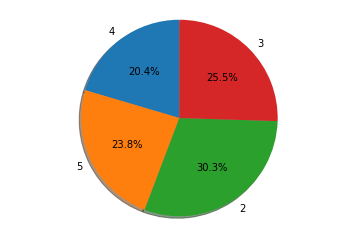

In [9]:
fv.pizza_graph(col='position_id', show=True)

## Feature Selection

In [10]:
from data_science_utils.feature_analysis.selection import FeatureSelection
fs = FeatureSelection(df, auxiliary)

In [14]:
print(df['0.11'].value_counts())

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\

In [11]:
fs.rank_correlation()

average_points_last_1_rounds
average_price_last_1_rounds
team_average_points_last_1_rounds
team_average_price_last_1_rounds
enemy_average_points_last_1_rounds
enemy_average_price_last_1_rounds
team_goals_scored_last_1_rounds
team_goals_taken_last_1_rounds
team_points_last_1_rounds
enemy_goals_scored_last_1_rounds
enemy_goals_taken_last_1_rounds
enemy_points_last_1_rounds
home_team
0
0.1
0.2
0.5
0.6
0.7
0.9
0.11


/home/noixd/Projects/cartolaAPI/env_cartola/lib/python3.5/site-packages/numpy/lib/function_base.py:3087: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


TypeError: Can't convert 'int' object to str implicitly

In [ ]:
# fs.one_feat_classifier()

In [ ]:
fs.corr_heatmap()

In [ ]:
fs.RFECV(scoring='neg_mean_squared_error')

In [ ]:
fs.plot_PCA()

## Train, validation, test

In [ ]:
from data_science_utils.data_processing.train_test_split import TrainTest
tts = TrainTest(df, auxiliary)
tts.split_dataset(train_ratio=0.8)
tts.normalize_data()

In [ ]:
model = LinearRegression
model_params = {}
model, train_preds, train_eval = tts.evaluate_train(model, model_params)
test_preds, test_eval = tts.evaluate_test()

## Result Analysis

In [ ]:
from data_science_utils.result_analysis.visualization import ResultsVisualization
rv = ResultsVisualization( y_test = tts.y_test, test_score=test_preds,
                          y_train = tts.y_train, train_score=train_preds, model=tts.model)
rv.score_hist()

In [ ]:
from data_science_utils.result_analysis.evaluation_metrics import EvaluationMetrics
em = EvaluationMetrics(df=df, y_train=tts.y_train, y_test=tts.y_test,
                       train_score=train_preds, test_score=test_preds)

In [ ]:
_ = em.eval_top(match_week=20, year=2016, number_of_players=50, real=True)

In [ ]:
_ = em.eval_top(match_week=20, year=2016, number_of_players=50, real=False)

In [ ]:
best_real_team, _ = em.get_best_team(match_week=20, year=2016, team_formation=(2,2,3,3), real=True)
best_predicted_team, _ = em.get_best_team(match_week=20, year=2016, team_formation=(2,2,3,3), real=False)

In [ ]:
best_real_team.style

In [ ]:
best_predicted_team.style

In [ ]:
for position in range(2,6):
    em.eval_top(position=position, match_week=20, year=2016, real=True, number_of_players=5)

In [ ]:
for position in range(2,6):
    em.eval_top(position=position, match_week=20, year=2016, real=False, number_of_players=5)

In [ ]:
_ = em.get_performance_without_outliers(match_week=20, year=2016, real=True)

In [ ]:
points_list = em.get_model_average_score()

In [ ]:
print(np.mean(points_list))
print(np.std(points_list))
print(np.max(points_list))
print(np.min(points_list))